In [2]:
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import numpy as np

#load pandas dataframe (rimuovo le righe vuote che putroppo sono presenti)
vax_series = pd.read_csv('data/posts_ULTRAcleaned_it_only_spacy.csv')
vax_series.dropna(inplace=True)

#salviamo una lista di lista con le parole tokenizzate
#tokenized_sent = []
#for s in vax_series["clean_text"]:
    #print(word_tokenize(s))
   #tokenized_sent.append(word_tokenize(s) )
#print(tokenized_sent)

vax_text = vax_series['clean_text'].tolist()

vax_text


[nltk_data] Downloading package punkt to /home/apsev/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['pronto affrontare settimana quirinale booster',
 'pass sanitaire guarigione booster pezzo dose migliore dellimmunite covid volere togliere scadenza spg tridosato autorizzare infettare natural arrestatele',
 'vaccinare bambino ricevere almeno dose Italia booster over piano notizia vaccare',
 'sereno sbrocchiamo periodo perch certezza curare grare riconoscente vaccinare booster fatelo vaccino obbligatorio',
 'vaccinare tredoso intero famiglia positivo covid influencer giornalista politico virologo commento proposito Greenpass booster tampono sivax novax emergenza',
 'giovane dovere dose booster unico scudo omicron',
 'booster',
 'continuare ce fregare draghi Milan Juventus inter Venezia quirinale quirinale draghistan vaccino obbligatorio vaccino covid novax dittatura drago vattenere serie tim amico booster greenpassre',
 'esperto israele chiedere somministrazione quarto dose vaccare over proteggere complicazione pi dimezzare rischio contagio covid israel booster',
 'inter inzago positi

# Sentence Bert!
per gli amici sbert :D


Carichiamo il modello pre-addestrato 'distiluse-base-multilingual-cased-v1' Multi-Lingual model of Universal Sentence Encoder for 15 languages: Arabic, Chinese, Dutch, English, French, German, Italian, Korean, Polish, Portuguese, Russian, Spanish, Turkish.

In [3]:
#bert-base-nli-mean-tokens

from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('distiluse-base-multilingual-cased-v1')

2023-03-27 11:20:04.218654: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-27 11:20:06.598500: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-27 11:20:06.598805: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-27 11:20:06.598817: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [4]:
#sentence_embeddings = sbert_model.encode(tokenized_sent[10])
sentence_embeddings = sbert_model.encode(vax_text)
print('Sample BERT embedding vector - length', len(sentence_embeddings[0]))
print('Sample BERT embedding vector - note includes negative values', sentence_embeddings[0])

Sample BERT embedding vector - length 512
Sample BERT embedding vector - note includes negative values [-5.04385158e-02 -1.73395891e-02  4.31571342e-02  1.33688878e-02
  7.10648522e-02 -3.91512252e-02 -2.09218189e-02  1.44852502e-02
  1.51459742e-02  1.37650818e-02 -6.80853799e-02  3.14955995e-03
 -7.38616381e-03  8.24066997e-03 -3.55060548e-02 -3.75935882e-02
  9.68567356e-02  1.22666704e-02 -4.62461524e-02 -8.53412375e-02
  4.12207730e-02 -2.28896365e-02 -3.76186185e-02 -1.84627734e-02
 -4.52392139e-02 -2.50276830e-03  1.71724409e-02 -1.23522142e-02
 -7.01503176e-03  4.61609801e-03 -3.40683870e-02  4.70608324e-02
 -1.00266235e-02 -1.34927453e-02  5.84660508e-02 -6.29503932e-03
 -6.39234111e-02 -2.01677922e-02 -1.93276431e-03  2.64468733e-02
 -2.33892188e-03 -3.63096893e-02 -9.31239780e-03  6.64616153e-02
  2.32750997e-02 -1.57704614e-02 -9.18773189e-03 -1.59550849e-02
 -2.65162066e-02 -7.31519330e-03  5.60495593e-02 -3.22474614e-02
  3.56918536e-02 -1.28686731e-03  2.59344373e-02 -3.

In [5]:
#loading and cleaning dataset with spacy
import spacy
import pandas as pd
import regex as re
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
it_stopwords = stopwords.words('italian')

#the stemmer requires a language parameter
snow_stemmer = SnowballStemmer(language='italian')

def cleaner(s):
    #removing numbers and special caracters
    s = re.sub(r'[^a-z\s]', '', s).strip()
    #remving multiple spaces
    s = " ".join(s.split()).strip()
    #removing apostrophe and splititng words
    s = s.replace("'", " ")
    #some manual corrections
    #s = s.replace(' accino', ' vaccino')
    #removing stopwords with nltk
    s = stop_word_remover(s)
    #stemming with nltk
    s = stemmer(s)

    return s


def stop_word_remover(text):
    word_tokens = word_tokenize(text)
    word_list = [word for word in word_tokens if word.lower() not in it_stopwords]
    return " ".join(word_list)

def stemmer(text):
    words = word_tokenize(text)
    stem_words = [snow_stemmer.stem(word) for word in words]
    return " ".join(stem_words)
  
#query = "Tu apri il tuo armadio e scegli, non lo so, quel maglioncino azzurro infeltrito per esempio, perché vuoi gridare al mondo che ti prendi troppo sul serio per curarti di cosa ti metti addosso" 
#frase diavolo veste prada: 0.3 / 0.2
query = "i vaccini sono pericolosi hanno fatto morire tante persone"
#frase novax: 0.4
#cleaning
#query = cleaner(query)

print(query)


2023-03-27 11:21:01.630356: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-27 11:21:01.630711: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-03-27 11:21:01.630778: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-03-27 11:21:01.630825: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-03-27 11:21:01.630868: W tensorflow/co

i vaccini sono pericolosi hanno fatto morire tante persone


[nltk_data] Downloading package stopwords to /home/apsev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
query_vec = sbert_model.encode([query])[0]
#query_vec = sberttokenizer(query)
#query_vec

# Distanza dal centro del cluster con SBERT

In [14]:
import numpy as np
# k-means - Inertia as the number of clusters varies
from sklearn.cluster import KMeans
from sklearn import preprocessing  # to normalise existing X

#create a numpy array with all the vectors
vectors = np.zeros((len(sentence_embeddings), 512))
for i in range(len(sentence_embeddings)):
    vectors[i] = sentence_embeddings[i]

#normalize
vectors = preprocessing.normalize(vectors)

X_train = pd.DataFrame(vectors)

n_clusters = 1
n_init = 10
max_iter = 300
tol = 0.0001
random_state = 2018
# n_jobs = 2
kMeans_inertia = pd.DataFrame(data=[],index=range(2), \
columns=['inertia'])

kmeansfirst = KMeans(n_clusters=n_clusters, n_init=n_init, \
    max_iter=max_iter, tol=tol, random_state=random_state )
   
kmeansfirst.fit(X_train)

center = kmeansfirst.cluster_centers_
center.shape

print(kmeansfirst.score(vectors))

#calculate the distance between each point and the center
X_train['distance'] = X_train.apply(lambda x: cosine(x, center[0]), axis=1)

X_train["distance"].describe()
   

-12654.678603121376


count    19097.000000
mean         0.419184
std          0.139866
min          0.151071
25%          0.324949
50%          0.379050
75%          0.465726
max          1.032808
Name: distance, dtype: float64

In [17]:
#calculating the distance from the center
from gensim import similarities
from scipy.spatial.distance import cosine, euclidean
import spacy
import pandas as pd
import regex as re
import numpy as np


#definiziamo una lista di frasi che dovrebbero essere classificate come anomalie
anomalies = ["il cane gioca a palla","ho dovuto ripristinare il PC per togliere tutti i suoi malware", "bella giornata oggi", "una frase che parla di tutt'altro ma il modo lunghissimo per tentare di ingannare il caro amico use" ]
novax_sentences = ["i vaccini uccidono", "non mi voglio vaccinare", "no al vaccino", "non farò mai il booster", "dopo 4 dosi il sistema immunitario fritto", "i vaccini fanno morire le persone anche se ci dicono di no"]
#provo con un testo casuale
#testo = "i vaccini fanno morire le persone anche se ci dicono di no"
#test_vector = sbert_model.encode([anomalies])
#test_vector = model(testo)

cosine_distance = []
euclidean_distance = []
'''cosine_distance.append(  cosine(test_vector[0],center[0]) )
cosine_distance.append(  cosine(test_vector[0],center[1]) )
euclidean_distance.append (euclidean(test_vector[0],center[0]))
euclidean_distance.append(euclidean(test_vector[0],center[1]))

print("Distance score cosine 1 - 2:",cosine_distance[0],cosine_distance[1])
print("Distance score euclidean 1 - 2:",euclidean_distance[0],euclidean_distance[1])
print ("Euclidean distance sum:",sum(euclidean_distance))'''

print("Anomalies score:")
for i in anomalies:
   
    test_vector = sbert_model.encode([cleaner(i)])
    test_vector_norm = preprocessing.normalize(test_vector)

    cosine_distance = cosine(test_vector[0],center[0])
    euclidean_distance = euclidean(test_vector[0],center[0])

    #cosine_distance_norm = cosine(test_vector_norm[0],center[0])
    #euclidean_distance_norm = euclidean(test_vector_norm[0],center[0])
   
    print ("Cosine:",cosine_distance)


print("Novax score:")
for i in novax_sentences:
    test_vector = sbert_model.encode([cleaner(i)])
    test_vector_norm = preprocessing.normalize(test_vector)

    cosine_distance = cosine(test_vector[0],center[0])
    euclidean_distance = euclidean(test_vector[0],center[0])

    #cosine_distance_norm = cosine(test_vector_norm[0],center[0])
    #euclidean_distance_norm = euclidean(test_vector_norm[0],center[0])
   
    print ("Cosine:",cosine_distance)
    #print ("Cosine norm:",cosine_distance_norm,"Euclidean norm: ",cosine_distance_norm)

Anomalies score:
Cosine: 0.838198735244313
Cosine: 0.7694199948839185
Cosine: 0.9209416843073897
Cosine: 0.7861207832912664
Novax score:
Cosine: 0.3165923256848593
Cosine: 0.32643497576833824
Cosine: 0.4172662231499148
Cosine: 0.8322807242101667
Cosine: 0.585996429111894
Cosine: 0.31139255816000333


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
data = sentence_embeddings
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 
df.shape

(19097, 2)

In [ ]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans2 = KMeans(n_clusters= 1)
 
#predict the labels of clusters.
label = kmeans2.fit_predict(df)
 
print(label)


[0 0 0 ... 0 0 0]


/home/apsev/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
label.shape

for i in label:
    if i==1:
        print(i)

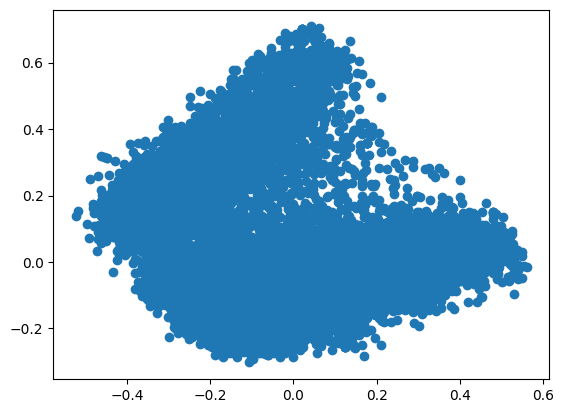

In [ ]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = df[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

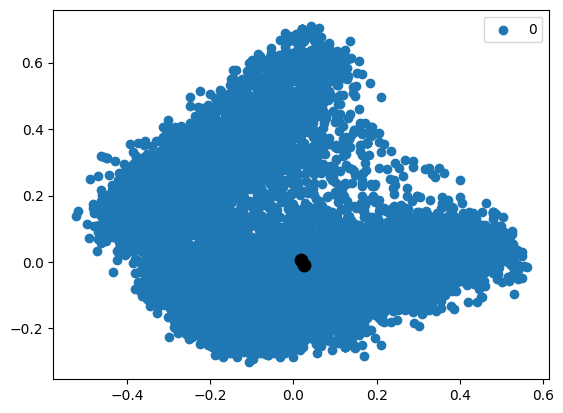

In [ ]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [ ]:
#calculating the distance from the 2 centers
from gensim import similarities
from scipy.spatial.distance import cosine, euclidean
import spacy
import pandas as pd
import regex as re
import numpy as np


#definiziamo una lista di frasi che dovrebbero essere classificate come anomalie
anomalies = ["il cane gioca a palla","ho dovuto ripristinare il PC per togliere tutti i suoi malware", "bella giornata oggi" ]
novax_sentences = ["i vaccini uccidono", "non mi voglio vaccinare", "no al booster", "dopo 4 dosi il sistema immunitario fritto", "i vaccini fanno morire le persone anche se ci dicono di no"]
#provo con un testo casuale
testo = "i vaccini fanno morire le persone anche se ci dicono di no"
#test_vector = sbert_model.encode([anomalies])
test_vector = sbert_model.encode([testo])

cosine_distance = []
euclidean_distance = []
cosine_distance.append(  cosine(test_vector[0],center[0]) )
cosine_distance.append(  cosine(test_vector[0],center[1]) )
euclidean_distance.append (euclidean(test_vector[0],center[0]))
euclidean_distance.append(euclidean(test_vector[0],center[1]))

print("Distance score cosine 1 - 2:",cosine_distance[0],cosine_distance[1])
print("Distance score euclidean 1 - 2:",euclidean_distance[0],euclidean_distance[1])
print ("Euclidean distance sum:",sum(euclidean_distance))

print("Anomalies score:")
for i in anomalies:
   
    test_vector = sbert_model.encode([i])

    cosine_distance = []
    euclidean_distance = []

    cosine_distance.append(  cosine(test_vector[0],center[0]) )
    cosine_distance.append(  cosine(test_vector[0],center[1]) )
    euclidean_distance.append (euclidean(test_vector[0],center[0]))
    euclidean_distance.append(euclidean(test_vector[0],center[1]))
   
    print ("Euclidean distance sum:",euclidean_distance[0],euclidean_distance[1])

print("Novax score:")
for i in novax_sentences:
    test_vector = sbert_model.encode([i])

    cosine_distance = []
    euclidean_distance = []

    cosine_distance.append(  cosine(test_vector[0],center[0]) )
    cosine_distance.append(  cosine(test_vector[0],center[1]) )
    euclidean_distance.append (euclidean(test_vector[0],center[0]))
    euclidean_distance.append(euclidean(test_vector[0],center[1]))
   
    print ("Euclidean distance sum:",euclidean_distance[0],euclidean_distance[1])

Distance score cosine 1 - 2: 0.45522351257168536 0.3711225348184969
Distance score euclidean 1 - 2: 0.7888414165872935 0.7331955896071656
Euclidean distance sum: 1.522037006194459
Anomalies score:
Euclidean distance sum: 1.0684307395836912 1.0792250167820527
Euclidean distance sum: 0.9781459771622256 1.004318692335739
Euclidean distance sum: 1.101406796488176 1.122720838028456
Novax score:
Euclidean distance sum: 0.7699325547613876 0.6033862071172992
Euclidean distance sum: 0.8174914460248501 0.6903748545520795
Euclidean distance sum: 1.046168588687585 1.0215914391308525
Euclidean distance sum: 0.9347732477187253 0.88402582152951
Euclidean distance sum: 0.7888414165872935 0.7331955896071656
